<a href="https://colab.research.google.com/github/sahilbaishya/HandsOnML/blob/main/Nerual_Nets_With_Keras_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import sklearn
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Image Classifier using Sequential API - Fashion MNIST Dataset

## Data Fetching and Exploration

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data();

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_test.shape

(10000, 28, 28)

## Splitting And Modeling

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [9]:
class_names[y_train[0]]

'Coat'

In [10]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


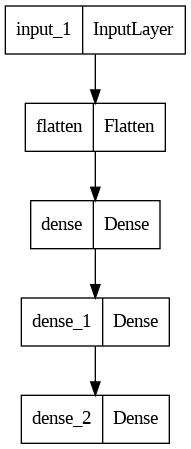

In [12]:
keras.utils.plot_model(model)

## Data Visualization

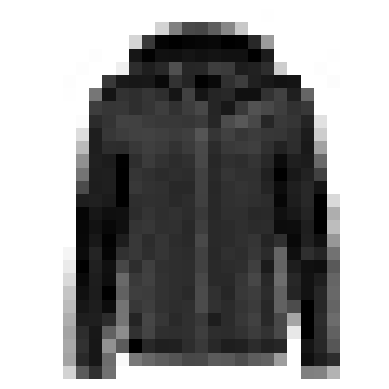

In [13]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

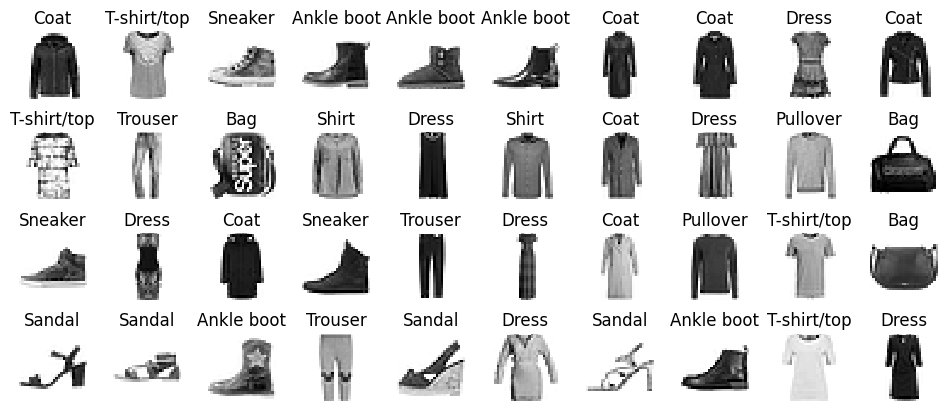

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('fashion_mnist_plot', bbox_inches='tight',pad_inches = 0)
plt.show()

## Model Exploration

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights

array([[ 0.04863386, -0.04570533, -0.07205248, ..., -0.01806893,
         0.05614476,  0.02510293],
       [ 0.00644235, -0.06590468, -0.00585835, ..., -0.03122593,
        -0.01166904,  0.06498055],
       [ 0.00548162, -0.01679549,  0.04150911, ...,  0.05716747,
         0.00622962,  0.06572562],
       ...,
       [-0.00531337, -0.04954736,  0.0557353 , ..., -0.06296555,
         0.02859697, -0.02920596],
       [ 0.05650312,  0.02131695, -0.0312986 , ...,  0.02570834,
        -0.00108584, -0.05671792],
       [ 0.0444473 ,  0.0698863 , -0.03736388, ...,  0.02070566,
        -0.03862194, -0.01519737]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
weights.shape

(784, 300)

In [21]:
biases.shape

(300,)

In [22]:
hidden2 = model.layers[2]
w2, b2 = hidden2.get_weights()

In [23]:
w2.shape

(300, 100)

In [24]:
b2.shape

(100,)

## Compilation and Training

In [25]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [26]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7169 - accuracy: 0.7686 - val_loss: 0.4942 - val_accuracy: 0.8356
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4857 - accuracy: 0.8294 - val_loss: 0.4782 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4406 - accuracy: 0.8462 - val_loss: 0.4391 - val_accuracy: 0.8406
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4151 - accuracy: 0.8547 - val_loss: 0.3962 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3936 - accuracy: 0.8629 - val_loss: 0.3827 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3772 - accuracy: 0.8678 - val_loss: 0.3956 - val_accuracy: 0.8608
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3646 - accuracy: 0.8706 - val_loss: 0.3935 - val_accuracy

In [27]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [29]:
history.history

{'loss': [0.7168512940406799,
  0.48571139574050903,
  0.4405902922153473,
  0.4151339530944824,
  0.3935982882976532,
  0.3772392272949219,
  0.364623486995697,
  0.3533593714237213,
  0.34410223364830017,
  0.3347582519054413,
  0.32528507709503174,
  0.31778430938720703,
  0.3115185499191284,
  0.3037314713001251,
  0.29754969477653503,
  0.29102569818496704,
  0.2859373986721039,
  0.2804892063140869,
  0.2748475968837738,
  0.27011141180992126,
  0.2644173204898834,
  0.26092782616615295,
  0.2563855051994324,
  0.250733882188797,
  0.24634648859500885,
  0.2434849590063095,
  0.2389499694108963,
  0.23583319783210754,
  0.2310616374015808,
  0.22734951972961426],
 'accuracy': [0.7686181664466858,
  0.8294000029563904,
  0.8461818099021912,
  0.8546727299690247,
  0.862854540348053,
  0.8677999973297119,
  0.8706181645393372,
  0.8743818402290344,
  0.8790363669395447,
  0.8813454508781433,
  0.8842363357543945,
  0.8866000175476074,
  0.8883090615272522,
  0.8911272883415222,
  0

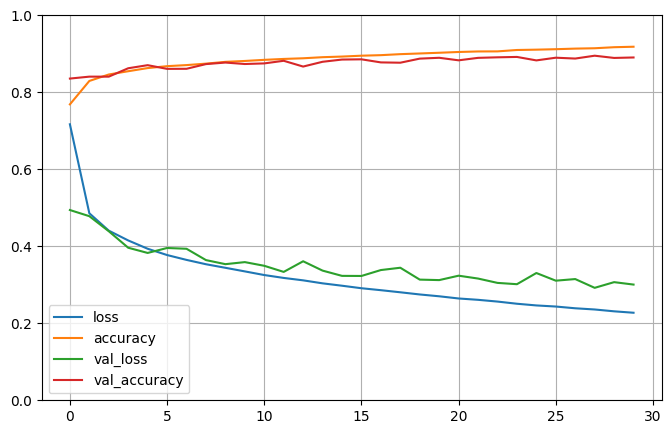

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.8893 - accuracy: 0.8453


[64.8892593383789, 0.845300018787384]

In [32]:
X_new = X_test[:3]

In [33]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 84ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
pred_classes = np.argmax(y_proba, axis =1)
pred_classes

array([9, 2, 1])

In [35]:
np.array(class_names)[pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

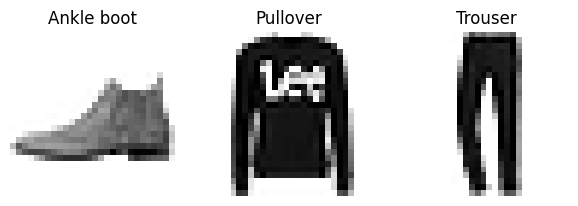

In [37]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('fashion_mnist_images_plot', format="png")
plt.show()

# Regression MLP using Sequential API - California Housing

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

In [40]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.7062 - accuracy: 0.0027 - val_loss: 0.8689 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7424 - accuracy: 0.0029 - val_loss: 0.6938 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.0029 - val_loss: 0.6624 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6495 - accuracy: 0.0029 - val_loss: 0.6059 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6174 - accuracy: 0.0029 - val_loss: 0.5730 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5880 - accuracy: 0.0029 - val_loss: 0.5441 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5621 - accuracy: 0.0029 - val_loss: 0.5245 - val_accuracy: 0.0044
Epoch 

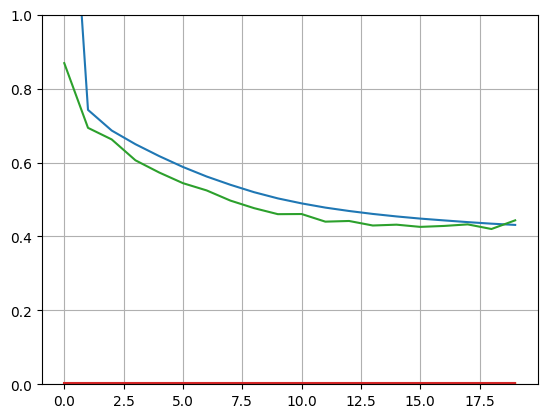

In [45]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.0021


In [47]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 46ms/step


In [48]:
y_pred

array([[0.6127697],
       [1.6640455],
       [3.0509388]], dtype=float32)

# Functional API - California Housing

In [49]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

## Normal Single input functional api

In [51]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_6[0][0]']            

In [53]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 52ms/step


In [54]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2098 - val_loss: 0.8939
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7280 - val_loss: 0.9736
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6470 - val_loss: 0.6011
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5973 - val_loss: 0.5510
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5623 - val_loss: 0.5208
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5339 - val_loss: 0.5018
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5118 - val_loss: 0.4973
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4947 - val_loss: 0.4633
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4792 - val_loss: 0.4476
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4670 - val_loss: 0.4370

## For different inputs along different paths

In [55]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [56]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.0377 - val_loss: 0.8419
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7463 - val_loss: 0.6780
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6493 - val_loss: 0.6107
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6039 - val_loss: 0.5791
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5747 - val_loss: 0.5436
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5484 - val_loss: 0.5230
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5285 - val_loss: 0.4998
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5097 - val_loss: 0.4795
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4930 - val_loss: 0.4654
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4801 - val_loss: 0.4488

1/1 [==============================] - 0s 58ms/step


## Adding Auxillary Output for regularization

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [59]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [60]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 2.6971 - main_output_loss: 2.4343 - aux_output_loss: 5.0619 - val_loss: 2.6246 - val_main_output_loss: 1.7145 - val_aux_output_loss: 10.8160
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.0481 - main_output_loss: 0.7881 - aux_output_loss: 3.3884 - val_loss: 1.8779 - val_main_output_loss: 0.6591 - val_aux_output_loss: 12.8468
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7933 - main_output_loss: 0.6204 - aux_output_loss: 2.3493 - val_loss: 1.8188 - val_main_output_loss: 0.5787 - val_aux_output_loss: 12.9796
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6988 - main_output_loss: 0.5676 - aux_output_loss: 1.8798 - val_loss: 1.6768 - val_main_output_loss: 0.5281 - val_aux_output_loss: 12.0149
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6466 - main_output_loss: 0.5361 - aux_output_loss: 1.6414 - val_

In [61]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 2ms/step - loss: 0.4727 - main_output_loss: 0.4172 - aux_output_loss: 0.9717


1/1 [==============================] - 0s 72ms/step


# Model Subclassing

In [62]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [63]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 7s 10ms/step - loss: 2.3239 - output_1_loss: 2.0470 - output_2_loss: 4.8166 - val_loss: 1.0900 - val_output_1_loss: 0.8155 - val_output_2_loss: 3.5604
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.9555 - output_1_loss: 0.7250 - output_2_loss: 3.0300 - val_loss: 0.8231 - val_output_1_loss: 0.6319 - val_output_2_loss: 2.5438
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7725 - output_1_loss: 0.6182 - output_2_loss: 2.1605 - val_loss: 0.7424 - val_output_1_loss: 0.5591 - val_output_2_loss: 2.3918
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6796 - output_1_loss: 0.5642 - output_2_loss: 1.7178 - val_loss: 0.7439 - val_output_1_loss: 0.5553 - val_output_2_loss: 2.4414
Epoch 5/10
363/363 [==============================] - 2s 7ms/step - loss: 0.6272 - output_1_loss: 0.5304 - output_2_loss: 1.4992 - val_loss: 0.7213 - val_output_1_loss: 0.5343 - val_o

# Saving And Restoring

In [64]:
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [66]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.7128 - val_loss: 1.2122
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7416 - val_loss: 0.7623
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6675 - val_loss: 0.6582
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6163 - val_loss: 0.5626
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5748 - val_loss: 0.5235
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5403 - val_loss: 0.4933
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5125 - val_loss: 0.4687
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4902 - val_loss: 0.4577
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4718 - val_loss: 0.4416
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4377


In [67]:
model.save("my_keras_model.h5")

In [72]:
model = keras.models.load_model("my_keras_model.h5")

In [73]:
model.predict(X_new)

1/1 [==============================] - 0s 47ms/step


array([[0.9618472],
       [1.4745808],
       [3.1819186]], dtype=float32)

In [74]:
model.save_weights("my_keras_weights.ckpt")

In [75]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.7511 - val_loss: 1.1418
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7292 - val_loss: 0.6600
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6400 - val_loss: 0.6446
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5919 - val_loss: 0.5746
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5555 - val_loss: 0.5260
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5247 - val_loss: 0.4921
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5010 - val_loss: 0.4684
Epoch 8/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4818 - val_loss: 0.4477
Epoch 9/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4666 - val_loss: 0.4347
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4373


In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4453 - val_loss: 0.4210
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4377 - val_loss: 0.4264
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4315 - val_loss: 0.4187
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4261 - val_loss: 0.4262
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4221 - val_loss: 0.4209
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4180 - val_loss: 0.4313
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4148 - val_loss: 0.4292
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4118 - val_loss: 0.4238
Epoch 9/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4089 - val_loss: 0.4328
Epoch 10/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4063 - val_lo

In [80]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])


356/363 [============================>.] - ETA: 0s - loss: 0.4258
val/train: 0.98
363/363 [==============================] - 2s 6ms/step - loss: 0.4264 - val_loss: 0.4191


# Tensorboard Integration